In [1]:
import numpy as np

In [2]:
#pip install keras

In [3]:
#pip install sklearn


In [4]:
#pip install tensorflow

# a) Collect data
Apple stock price data from 2015 to 2020
# b) Pre-Process the data, Train and Test
Data Cleaning, modification, analysis
# c) Create a Stacked LSTM model for Stock Prediction
Using tensorflow make a model and fit the training data to the model
# d) Predict the test data and plot the output
Check the output and optimize wrt the RMSErrors
# e) Predict and Forecast the next months data for the stock

In [5]:
# We can get data from pandas_datareader , Tingo an API in it, Apple dataset has been procured from that

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv(r'C:\Users\JithinRajan\Downloads\Stock-MArket-Forecasting-master\Stock-MArket-Forecasting-master\AAPL.csv')

In [8]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [9]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [10]:
df1=df.reset_index()['close']   #Reset index keeps the indexes intact for the column

In [11]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

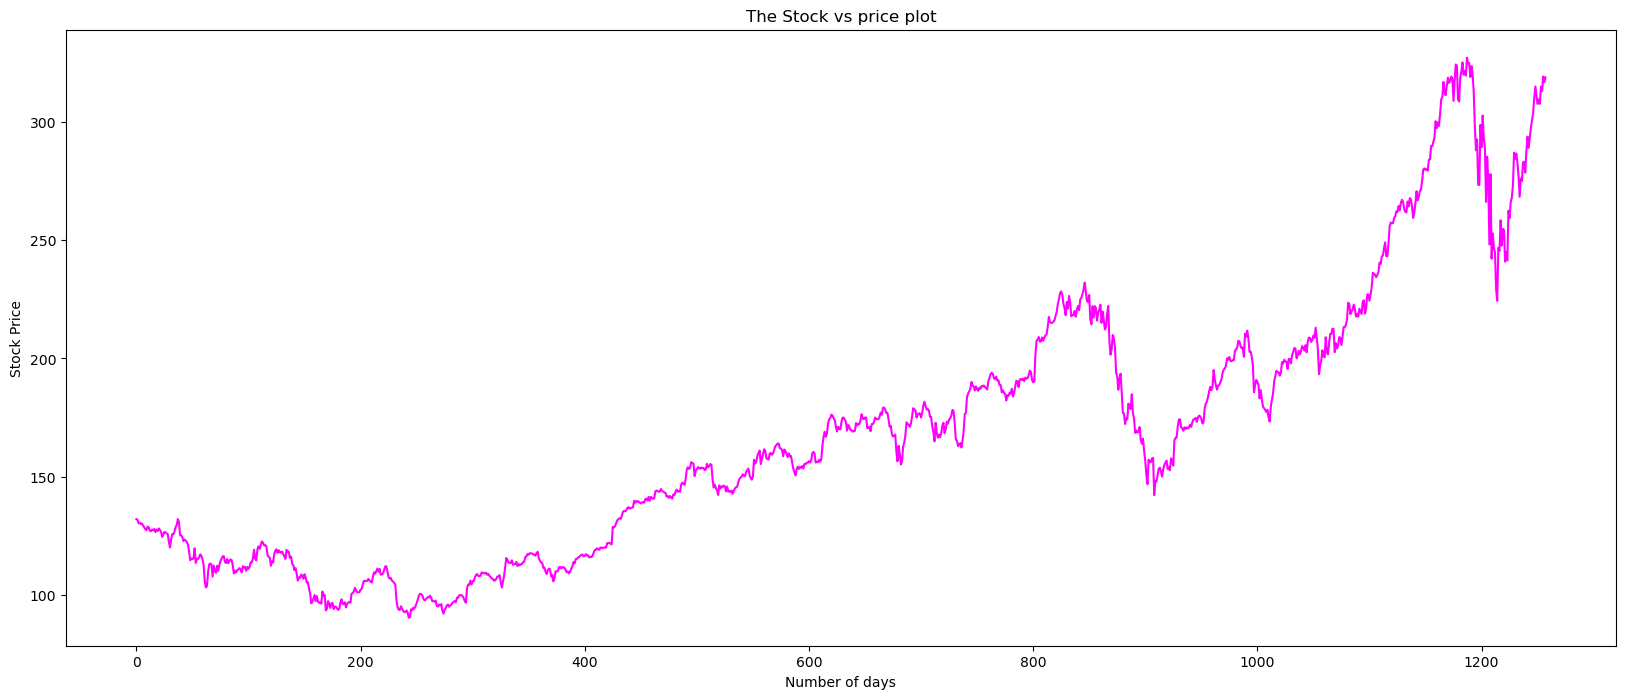

In [12]:
import matplotlib.pyplot as plt

# Assuming df1 contains your data
# Create a new figure and set the size using the 'figsize' parameter
plt.figure(figsize=(20, 8))  # Adjust the numbers (width, height) to your desired size

# Plot your data with the specified color
plt.plot(df1, color='magenta')

# Add labels, title, etc. if needed
plt.xlabel('Number of days')
plt.ylabel('Stock Price')
plt.title('The Stock vs price plot')

# Show the plot
plt.show()


# The model we will be using is LSTM
Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) designed to process sequences of data and learn long-term dependencies. It is suitable for stock price prediction because it can capture patterns and dependencies in time-series data, such as historical stock prices, due to its ability to store information over extended periods. LSTMs can handle the temporal nature of stock prices, enabling them to learn from past price movements and potentially identify trends, seasonal patterns, and other complex relationships in the data. This makes them well-suited for modeling stock price movements and providing more accurate predictions compared to traditional models.

### Sensitivity
LSTM (Long Short-Term Memory) networks are sensitive to the scale of input data because of the activation functions(Sigmoid , tanH) and weight updates they use. When data has large differences in scale, it can lead to problems during training, such as vanishing or exploding gradients, affecting the model's ability to learn effectively. Scaling the data to a common range, like 0 to 1 or standardized with mean 0 and standard deviation 1, helps LSTM perform better, converge faster, and avoid overfitting, especially when dealing with time-series data like stock prices.

# PREPROCESSING AND TRAIN TEST SPLIT

### SCALING

In [13]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))  # Setting the feature scales between 0 and 1
df1= scaler.fit_transform(np.array(df1).reshape(-1,1)) # This will return the column as scaled array

In [15]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

### Train test Split

Cross Validation, Random Seed works well with Linear regression or Classification problem
But for Time Series data it is different.
The order of our data is very important as the prices/data are dependent on the previous prices/data of the prev date.  
Thus in the splitting part we are preserving the order

In [16]:
training_size= int(len(df1)*0.65)
test_size= len(df1) - training_size
train_data, test_data= df1[0:training_size,:], df1[training_size:len(df1),:1]

### Time Steps
Generally in stocks what happens in the stock market, is the stock at a given day is dependent on the prices of the stock on previous days hence it is important for the model to take this into consideration

timesteps will take into consideration the number of previous prices of the stock to be considered while predicting the next price of the stock (HMM propbability type)
the time step will keep shifting by 1 in the forward direction with the next stock

### FEATURE ENGINEERING
What we will do is we will train our model by collecting the data of previous prices of the stock and increasing the number of features that would be used to train the model , so that the prediction is based on the last x number of prices for the stock. ex if we want to consider the past 100 days stock price to predict the stock price tomorrow, we would have 100 features as input into the model 

Xtrain= The stock price of a given day we want to predict
Ytrain+ The the previous 100days stock prices of the same stock
similarly for Xtest and Ytest

In [17]:
# Function to engineere our features in the dataset

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)                   #The stockprice we want to predict
		dataY.append(dataset[i + time_step, 0])   #The stockprices of the previous days we need to predict
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# CREATE A STACKED LSTM  MODEL

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 133ms/step - loss: 0.0198 - val_loss: 0.0434
Epoch 2/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 3/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 4/100
12/12 [==============================] - 1s 79ms/step - loss: 8.4880e-04 - val_loss: 0.0059
Epoch 5/100
12/12 [==============================] - 1s 81ms/step - loss: 7.2524e-04 - val_loss: 0.0067
Epoch 6/100
12/12 [==============================] - 1s 80ms/step - loss: 6.3199e-04 - val_loss: 0.0047
Epoch 7/100
12/12 [==============================] - 1s 80ms/step - loss: 6.2745e-04 - val_loss: 0.0042
Epoch 8/100
12/12 [==============================] - 1s 81ms/step - loss: 6.2019e-04 - val_loss: 0.0039
Epoch 9/100
12/12 [==============================] - 1s 81ms/step - loss: 6.0010e-04 - val_loss: 0.0037
Epoch 10/100
12/12 [==============================] - 1s 81ms/step - loss: 

### Predicting the stock price

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 14ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate the ERROR in form of RMSE

In [28]:
### Calculate RMSE performance metrics for Training data
import math
from sklearn.metrics import mean_squared_error
Train_RMSEError=math.sqrt(mean_squared_error(y_train,train_predict))
Train_RMSEError

140.72104926776635

In [29]:
### Calculate RMSE performance metrics for testing data
import math
from sklearn.metrics import mean_squared_error
Test_RMSEError=math.sqrt(mean_squared_error(ytest,test_predict))
Test_RMSEError


# This is a good indication as the difference between the test and train error is not thatmuch just around 100

233.289137820432

# FOECASTING THE MODEL'S PERFORMANCE

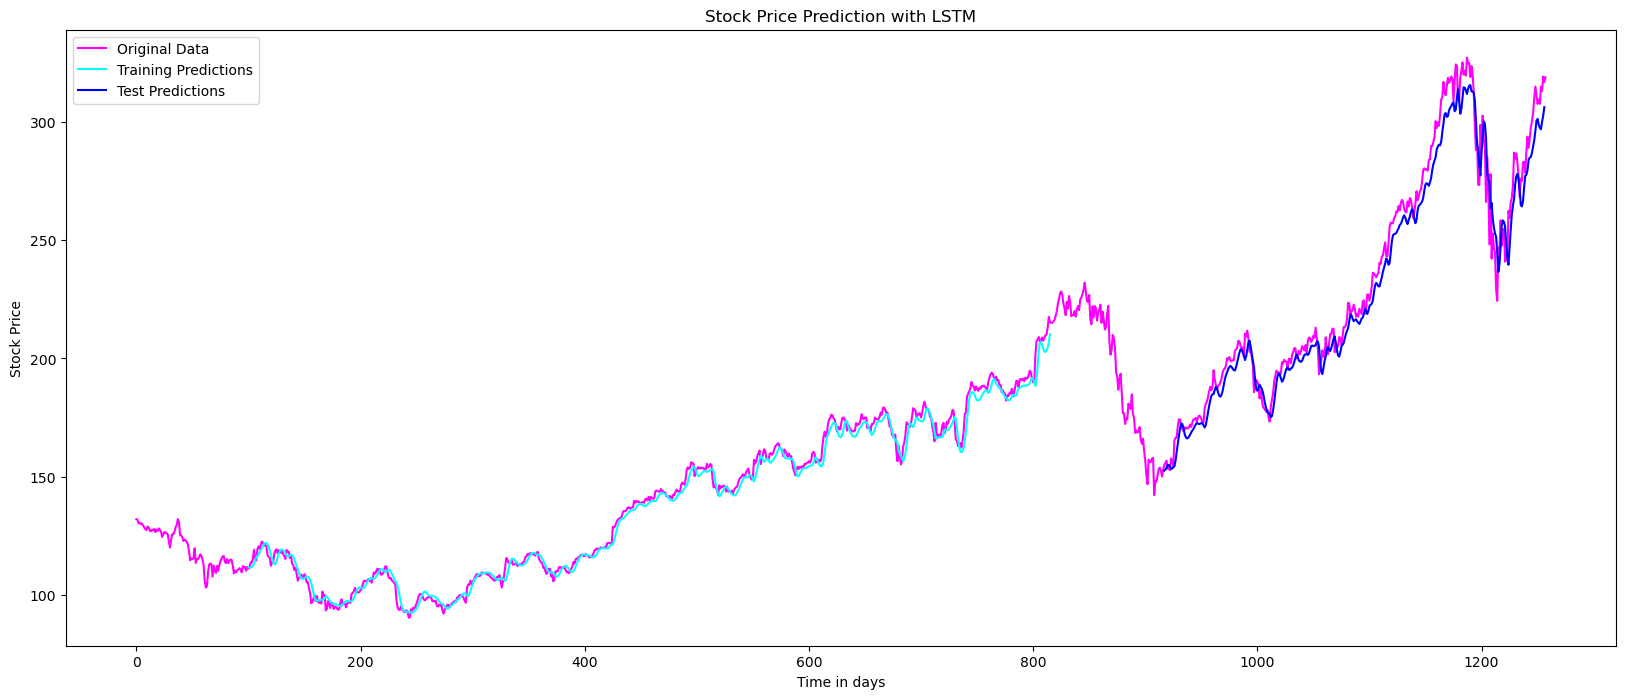

In [30]:
import matplotlib.pyplot as plt

# Assuming you have already defined the variables train_predict, test_predict, and df1

# Shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# Plot baseline and predictions with legends and colors
plt.figure(figsize=(20, 8))  # Adjust the figure size if needed

plt.plot(scaler.inverse_transform(df1), label='Original Data', color='magenta')
plt.plot(trainPredictPlot, label='Training Predictions', color='cyan')
plt.plot(testPredictPlot, label='Test Predictions', color='blue')

plt.xlabel('Time in days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with LSTM')
plt.legend()

plt.show()


In [31]:
len(test_data)


441

In [32]:
x_input=test_data[341:].reshape(1,-1)    #The input data ie one stock price at a day and the previous 100 days price
x_input.shape

(1, 100)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [34]:
# demonstrate prediction for next 30 days

#It is basically taking in 1 price ata aday and its previous 100 price values 
# and making one element in a list, similarly we are making 30 elements to predict 30 days outcome.
# Another step is while we are making the list for the same we are adding the predicted value back to the list and removing the previous value
# We are shifting the values by one ex for first day the previous 30 days, for the second day the previous 30 days ie 29 days in the previous data plus newly predicted data
# The below code does the same
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.92087305]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
import matplotlib.pyplot as plt

In [37]:
len(df1)

1258

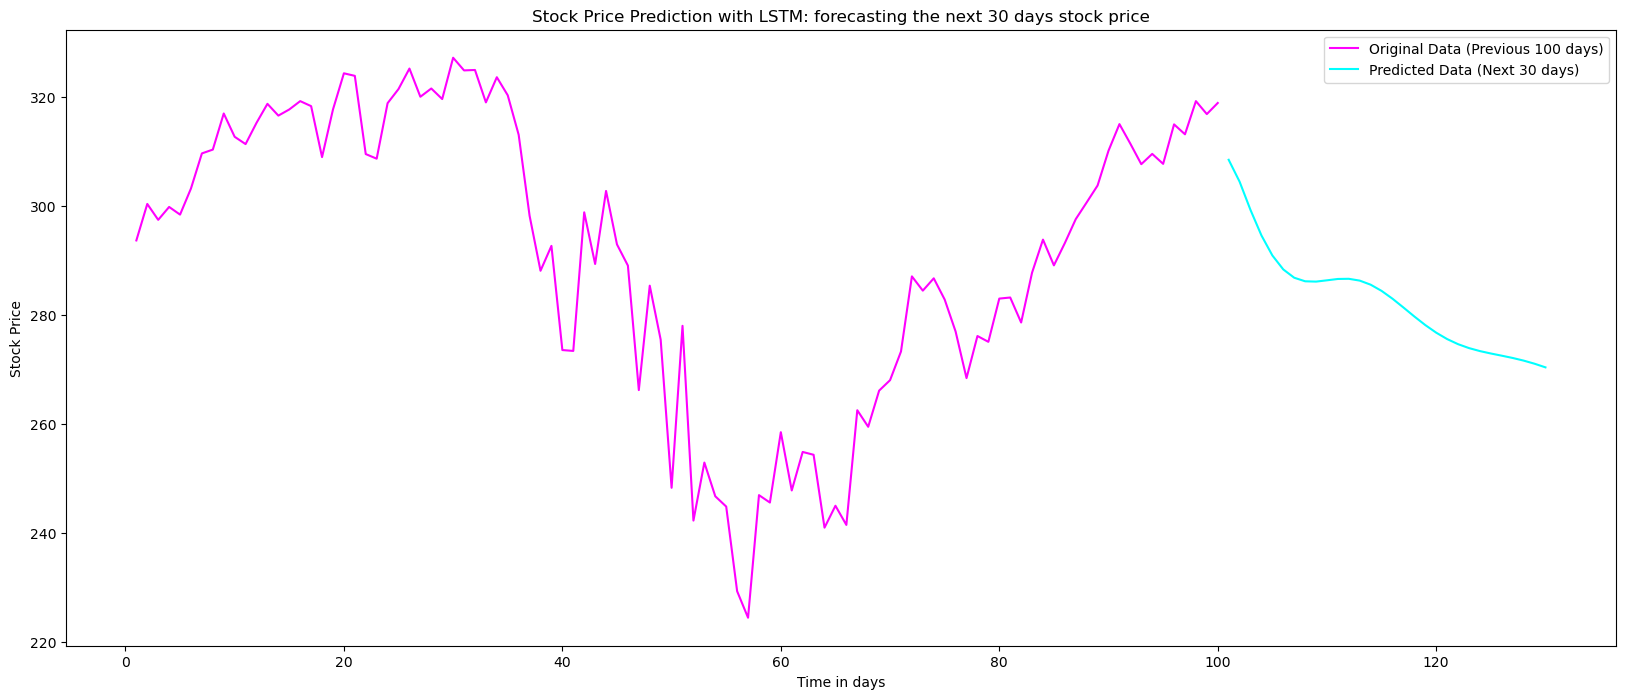

In [48]:
import matplotlib.pyplot as plt

# Assuming you have already defined day_new, day_pred, df1, and lst_output

# Create a new figure and set the size
plt.figure(figsize=(20, 8))  # Adjust the numbers (width, height) to your desired size

# Plot original previous 100 days data with magenta color
plt.plot(day_new, scaler.inverse_transform(df1[1158:]), color='magenta', label='Original Data (Previous 100 days)')

# Plot predicted new 30 days data with cyan color
plt.plot(day_pred, scaler.inverse_transform(lst_output), color='cyan', label='Predicted Data (Next 30 days)')

# Add labels and title
plt.xlabel('Time in days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with LSTM: forecasting the next 30 days stock price')
plt.legend()

plt.show()


# The magenta line shows the price of the stock in previous 100 days and the cyan line shows the price of the stock predicted for the next 30 days

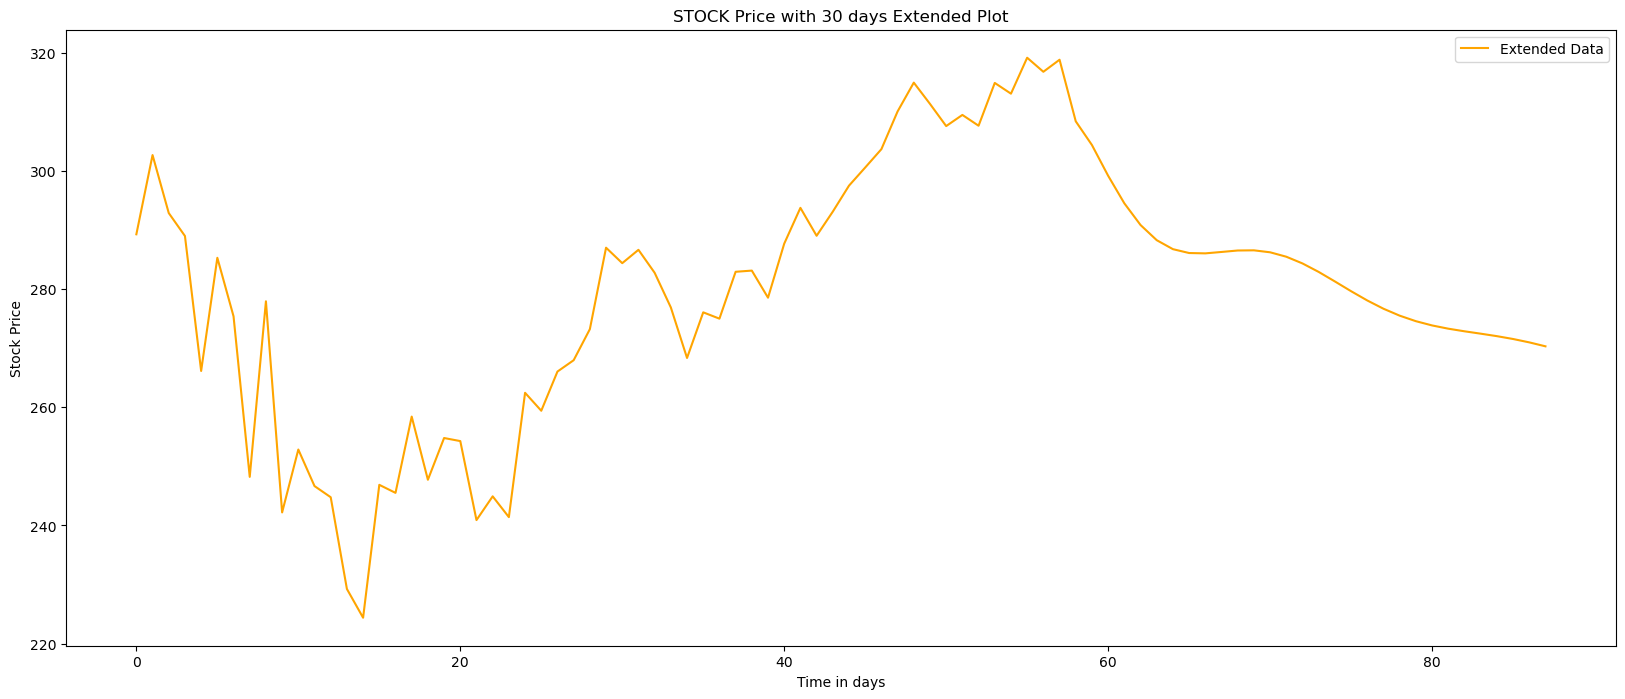

In [59]:
df3 = scaler.inverse_transform(df1).tolist()
df3.extend(scaler.inverse_transform(lst_output))

# Create a new figure and set the size
plt.figure(figsize=(20, 8))

# Plot the extended data starting from the 1200th index with cyan color
plt.plot(df3[1200:], color='orange', label='Extended Data')

# Add labels and title
plt.xlabel('Time in days')
plt.ylabel('Stock Price')
plt.title('STOCK Price with 30 days Extended Plot')

# Add a legend to differentiate the plot
plt.legend()

plt.show()